In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

In [95]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/


%matplotlib inline

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
#X = X / 1000.0   #tried this and it didn't change anything

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [96]:
#Split data using a 70%-30% split for the training and validation dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [97]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(67, 1)
(67, 1)
(30, 1)
(30, 1)


In [98]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(1,))) #single hidden layer containing two neurons with ReLU as activation function
model.add(Dense(1))


model.summary()

SGD_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=SGD_optimizer, loss='mse') #Optimize the network with stochastic gradient descent method (SGD), mean squared error to calculate the loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
#choose a suitable learning rate and number of epochs to minimize the loss
history = model.fit(x_train, y_train, epochs=40, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 26.0683 - val_loss: 41.5460
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.0609 - val_loss: 41.0906
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 22.7198 - val_loss: 40.9801
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 28.7685 - val_loss: 40.8437
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26.9741 - val_loss: 40.5726
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25.3509 - val_loss: 40.2734
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.4568 - val_loss: 40.2577
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23.1707 - val_loss: 40.1961
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.6746 - val_loss: 40.2203
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 21.5101 - val_loss: 39.8276
Epoch 11/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.1200 - val_loss: 39.7728
Epoch 12/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 24.51

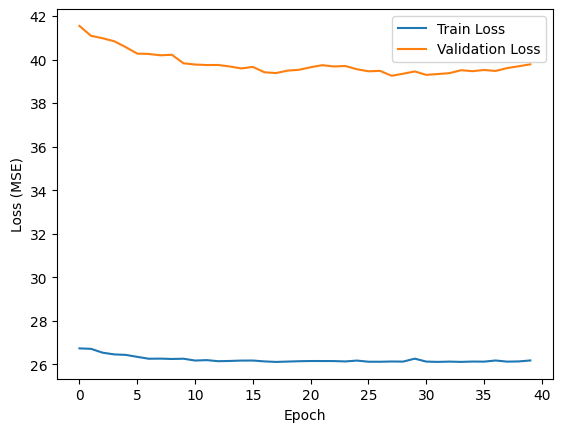

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


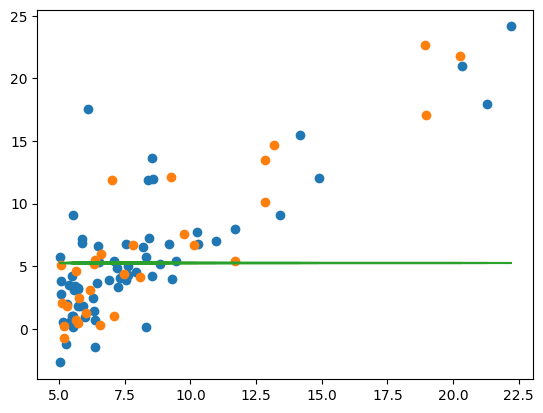

In [101]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot(x_test, y_test, 'o', label='Validation Data')
plt.plot(x_train, model.predict(x_train), '-', label='Training Fit')

In [103]:
#predict the price of a house in a city with population of 165, 000.
population_value = np.array([[16.5]])
predicted_price = model.predict(population_value)
print("Predicted price for a city with 165,000 population:", predicted_price[0][0]*10000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted price for a city with 165,000 population: 52807.76023864746


In [104]:
#Calculate a useful regression metric
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Mean Squared Error: 39.78229626016166
R-Squared: -0.045114198772310043


In [105]:
#Explain the trends you found in the plots for training and validation losses

Despite playing around with the tuning parameters for this problem extensively, I have not been able to find suitable suitable learning rate and number of epochs to minimize the loss meaninfully. Everything I tried invariably resulted in the loss plateuing around 39. Seems like that must be the global minimum because whatever I try gets me to 39.

I suppose something with the error function is not "right".

I suspect that the fixed architecture of the neural network and the optimizer are not conducive to a solution for this problem or this type of problem.